<a href="https://colab.research.google.com/github/Joad-Bot/Sistemas-inteigentes-2/blob/main/Cinem%C3%A1tica%20Inversa%20FK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SI2/refs/heads/main/14%20Cinem%C3%A1tica%20Inversa/Dibujar_Manipulador.py'

import numpy as np
import matplotlib.pyplot as plt
from Dibujar_Manipulador import dibujar_manipulador
from IPython import display

--2025-05-19 04:05:10--  https://raw.githubusercontent.com/Jegovila/SI2/refs/heads/main/14%20Cinem%C3%A1tica%20Inversa/Dibujar_Manipulador.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1067 (1.0K) [text/plain]
Saving to: ‘Dibujar_Manipulador.py’

Dibujar_Manipulador 100%[===================>]   1.04K  --.-KB/s    in 0s      

2025-05-19 04:05:11 (51.9 MB/s) - ‘Dibujar_Manipulador.py’ saved [1067/1067]



Función de penalización

In [2]:
def Penalty(x, xl, xu):
    D = x.size
    z = 0

    # Aqui agrega tu función de penalización
    for j in range(D):
        if x[j] < xl[j]:
            z = z + (x[j]-xl[j]) ** 2
        elif x[j] > xu[j]:
            z = z + (x[j] - xu[j]) ** 2
        else:
            z = z + 0
    #----------------------------------

    return z

Función objetivo

In [3]:
f = lambda q: np.linalg.norm(pd - p(q[0], q[1], q[2]))                  # <----------------- Completar
fp = lambda x, xl, xu:  f(x)+1000*  Penalty(x, xl, xu);                 # <----------------- Completar

Parámetros

In [4]:
animacion = 1
pd = [-0.5, -0.75]
a_1 = 0.35
a_2 = 0.35
a_3 = 0.25

beta = 1000
xl = np.array([-np.pi, -np.pi, -np.pi])                 # <----------------- Completar
xu = np.array([np.pi, np.pi, np.pi])                    # <----------------- Completar


G = 30                    # <----------------- Completar
N = 20                    # <----------------- Completar
D = 3

F = 0.6                     # <----------------- Completar
CR = 0.9                    # <----------------- Completar

# DE

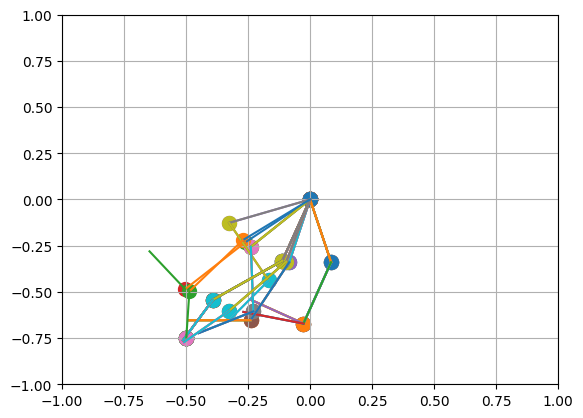

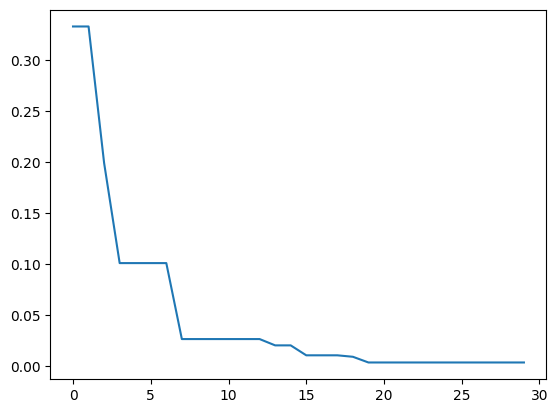

In [5]:
p = lambda theta_1, theta_2, theta_3: np.array([a_2*np.cos(theta_1 + theta_2) + a_1*np.cos(theta_1) + a_3*np.cos(theta_1 + theta_2 + theta_3),
                                                a_2*np.sin(theta_1 + theta_2) + a_1*np.sin(theta_1) + a_3*np.sin(theta_1 + theta_2 + theta_3)])

x = np.zeros((D, N))
fitness = np.zeros(N)

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[:, i])

fx_plot = np.zeros(G)

for n in range(G):
    if animacion:
        for i in range(0,N,50):
          display.display(plt.gcf())
          display.clear_output(wait=True)
          plt.scatter(pd[0], pd[1], marker='o', s=100)
          dibujar_manipulador(x[:, i])

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        r3 = r2
        while r3 == r2 or r3 == r1 or r3 == i:
            r3 = np.random.randint(N)

        v = x[:, r1] + F * (x[:, r2] - x[:, r3])

        # Recombinación
        u = np.zeros(D)

        for j in range(D):
            r = np.random.rand()

            if r <= CR:
                u[j] = v[j]
            else:
                u[j] = x[j, i]

        # Selección
        ## ------- Relocalización
        for j in range(D):
          ## ---- A: Aleatoria ---- ##
          if xu[j] > u[j] > xl[j]:
              pass
          else:
              u[j] = xl[j] + (xu[j] - xl[j]) * np.random.rand()
        fitness_u = fp(u, xl, xu)

        if fitness_u < fitness[i]:
            x[:, i] = u.copy()
            fitness[i] = fitness_u

        if fitness_u < fitness[i]:
            x[:, i] = u.copy()
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

q = x[:, igb]

theta_1 = q[0]
theta_2 = q[1]
theta_3 = q[2]

p = np.array([a_2*np.cos(theta_1 + theta_2) + a_1*np.cos(theta_1) + a_3*np.cos(theta_1 + theta_2 + theta_3),
                a_2*np.sin(theta_1 + theta_2) + a_1*np.sin(theta_1) + a_3*np.sin(theta_1 + theta_2 + theta_3)])

display.display(plt.gcf())
display.clear_output(wait=True)
dibujar_manipulador(q)

plt.show()
plt.plot(fx_plot)